In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://www.datacamp.com/community/tutorials"
html = urlopen(url)
soup = BeautifulSoup(html, 'html')

pages = [i.text for i in soup.find_all('a') if 'community/tutorials?page=' in str(i)]
lastpage = pages[-1]
print(lastpage)

26


In [3]:
description=[]
upvote=[]
author=[]
publishdate=[]
title=[]

for cp in np.arange(1,int(lastpage)+1):
    url = "https://www.datacamp.com/community/tutorials?page=" + str(cp)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    description.append([i.text for i in soup.find_all(class_='jsx-379356511 blocText description')])
    upvote.append([i.text for i in soup.find_all(class_='jsx-1972554161 voted')]) 
    author.append([i.text for i in soup.find_all(class_='jsx-566588255 name')])
    publishdate.append([i.text for i in soup.find_all(class_='jsx-566588255 date')])
    title.append([i.text for i in soup.find_all(class_='jsx-379356511 blue')])
    time.sleep(3)
print ("Done!")

Done!


In [4]:
upvote

[['5',
  '7',
  '14',
  '12',
  '11',
  '12',
  '12',
  '8',
  '9',
  '16',
  '29',
  '19',
  '22',
  '12',
  '11'],
 ['14',
  '12',
  '9',
  '15',
  '17',
  '22',
  '15',
  '9',
  '8',
  '13',
  '9',
  '9',
  '10',
  '11',
  '18'],
 ['8',
  '12',
  '44',
  '12',
  '133',
  '42',
  '140',
  '23',
  '12',
  '47',
  '105',
  '136',
  '34',
  '113',
  '66'],
 ['50',
  '25',
  '120',
  '84',
  '67',
  '107',
  '137',
  '286',
  '64',
  '28',
  '23',
  '46',
  '6',
  '5',
  '27'],
 ['619',
  '40',
  '82',
  '406',
  '102',
  '100',
  '22',
  '49',
  '6',
  '7',
  '5',
  '8',
  '9',
  '18',
  '12'],
 ['16',
  '10',
  '13',
  '16',
  '27',
  '37',
  '18',
  '32',
  '9',
  '17',
  '6',
  '38',
  '18',
  '20',
  '18'],
 ['28',
  '9',
  '24',
  '15',
  '14',
  '16',
  '18',
  '11',
  '11',
  '38',
  '16',
  '8',
  '7',
  '12',
  '40'],
 ['21',
  '21',
  '15',
  '54',
  '8',
  '27',
  '17',
  '9',
  '9',
  '10',
  '30',
  '37',
  '66',
  '16',
  '89'],
 ['20',
  '20',
  '9',
  '14',
  '27',
  '24

In [5]:
descriptionflat = [y for x in description for y in x]
upvoteflat = [y for x in upvote for y in x]
authorflat = [y for x in author for y in x]
publishdateflat = [y for x in publishdate for y in x]
titleflat = [y for x in title for y in x]
publishdateformatted = [datetime.strptime(re.sub('rd, ', ', ', re.sub('st, ', ', ', re.sub('nd, ', ', ', re.sub('th, ',', ',a)))), "%B %d, %Y") for a in publishdateflat]


In [6]:
cdata = {"author":authorflat,"publishdate":publishdateformatted,"title":titleflat,"description":descriptionflat,"upvote":upvoteflat}
df = pd.DataFrame(data = cdata)
df.to_csv("c:\\Users\\danielmarian\\Desktop\\Tutorials\\tutorials.csv", header=True, index=False)

In [7]:
datacamp = pd.read_csv("c:\\Users\\danielmarian\\Desktop\\Tutorials\\tutorials.csv", parse_dates=["publishdate"], infer_datetime_format=True)


In [8]:
datacamp.shape

(381, 5)

In [9]:
datacamp

,author,publishdate,title,description,upvote
0,Aditya Sharma,2020-05-25,Reading and Writing Files in Python,Learn how to read and write data into flat fil...,5
1,Aditya Sharma,2020-05-22,Python Excel Tutorial: The Definitive Guide,Learn how to read and import Excel files in Py...,7
2,Olivia Smith,2020-05-11,Matrices in R,"Learn all about R's matrix, naming rows and co...",14
3,Sejal Jaiswal,2020-05-11,Scope of Variables in Python,Learn what variable scopes are all about and g...,12
4,Aditya Sharma,2020-05-08,Introduction to Python IDLE,Learn what is Python IDLE (Integrated Developm...,11
...,...,...,...,...,...
376,Karlijn Willems,2014-06-09,Decimal Comma or Point? A googleVis visualization,Decimal comma or decimal point? A handy tool t...,3
377,Karlijn Willems,2014-06-03,What Is the Best Statistical Programming Langu...,The infograph 'Statistical Language Wars' comp...,6
378,Karlijn Willems,2014-03-31,Data Science Cartoons: a Top Seven List by Dat...,The 7 funniest data science cartoons on the we...,10
379,Karlijn Willems,2014-03-17,R posts on Stack Overflow | A Top 5 selection ...,Stack Overflow is a useful resource for techni...,4


In [10]:
datacamp.head()


,author,publishdate,title,description,upvote
0,Aditya Sharma,2020-05-25,Reading and Writing Files in Python,Learn how to read and write data into flat fil...,5
1,Aditya Sharma,2020-05-22,Python Excel Tutorial: The Definitive Guide,Learn how to read and import Excel files in Py...,7
2,Olivia Smith,2020-05-11,Matrices in R,"Learn all about R's matrix, naming rows and co...",14
3,Sejal Jaiswal,2020-05-11,Scope of Variables in Python,Learn what variable scopes are all about and g...,12
4,Aditya Sharma,2020-05-08,Introduction to Python IDLE,Learn what is Python IDLE (Integrated Developm...,11


In [12]:
datacamp['publishyymm'] = datacamp['publishdate'].dt.strftime("%Y-%b")
datacamp["posts"] = 1

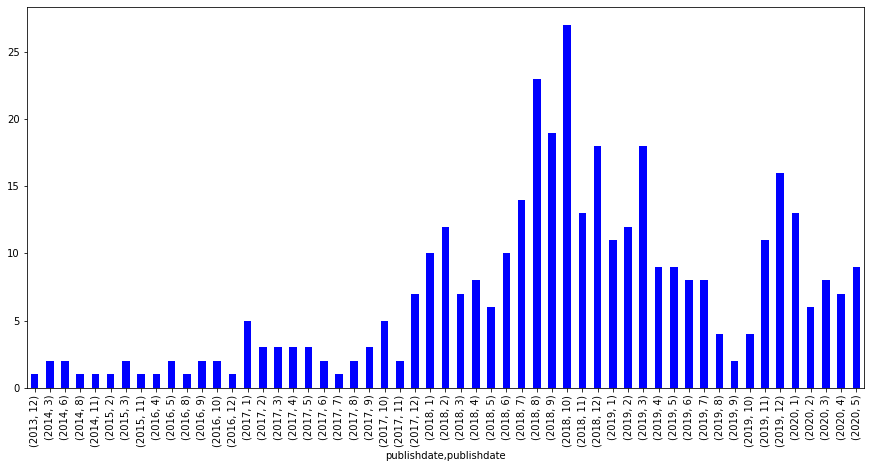

In [13]:
datacamp.groupby([datacamp['publishdate'].dt.year, datacamp['publishdate'].dt.month]).size().plot(kind='bar', figsize=(15,7), color='b')


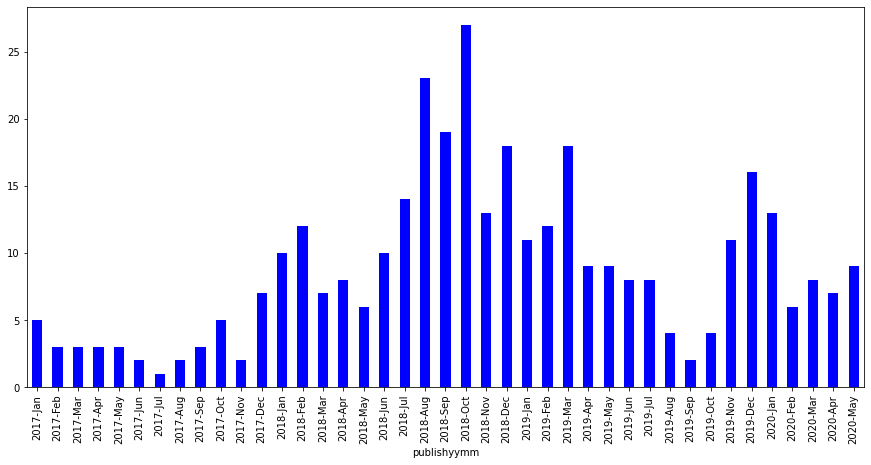

In [14]:
datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).groupby([datacamp['publishyymm']],sort=False).size().plot(kind='bar', figsize=(15,7), color='b')


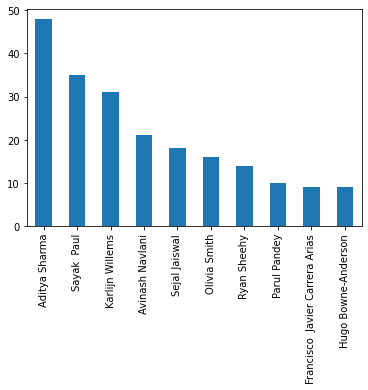

In [15]:
datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].plot(kind='bar')


In [16]:
topauthors = datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].index


In [20]:
dh = datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).set_index(["publishdate"], drop = False)
dh["publishdateone"] = pd.to_datetime(dh.publishdate.astype(str).str[0:7]+'-01')

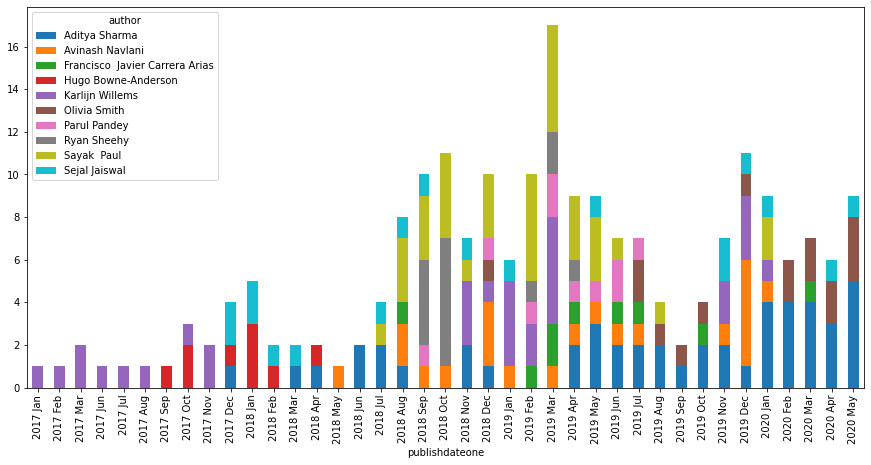

In [21]:
dhp = dh[dh["author"].isin(topauthors)].pivot_table(index="publishdateone",values="posts",columns="author", aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(15,7))
dhp.plot(ax=ax, kind='bar', stacked=True)
ticklabels = [item.strftime('%Y %b') for item in dhp.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

In [22]:
upvotes = dh[dh["author"].isin(topauthors)].groupby(['author'], as_index=False).agg({'posts':"sum",      
                                     'upvote': "sum"})

In [ ]:
sns.lmplot('posts',
           'upvote',
           data=upvotes,
           fit_reg=False,
           hue="author",
           scatter_kws={"marker": "D",
                        "s": 100})